# Big Data - Progetto

## Comprensione e analisi esplorativa dei dati

Il dataset di riferimento si trova al seguente link su Kaggle: https://www.kaggle.com/datasets/dilwong/flightprices/.

Si tratta di un file .csv da 31.09 GB, da cui sono stati estratti tre *sample* di diverse dimensioni, per la comprensione e l'analisi esplorativa si utilizzerà il file di dimensione più piccola. Il file è composto da 27 colonne e ciascuna riga rappresenta un biglietto acquistabile trovato su Expedia. I dati sono stati raccolti nel periodo dal 16/04/2022 fino al 05/10/2022.

### Caricamento librerie

Per prima cosa, si devono caricare le librerie necessarie per effettuare operazioni sui dati:
- **numpy** per creare e operare su array a N dimensioni;
- **pandas** per caricare e manipolare dati tabulari;
- **matplotlib** e **seaborn** per creare grafici.

In [25]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Caricamento dei dati

Si effettua il caricamento del file *itineraries-sample02.csv* scaricabile dalla cartella su [OneDrive](https://liveunibo-my.sharepoint.com/:f:/g/personal/giulia_nardicchia_studio_unibo_it/Ei2686kRO3JFrY-4LnImGpwBtge9FRErDnIgvT2h2QB-Pg?e=VrufWl).

In [49]:
data = pd.read_csv('../../../../datasets/big/itineraries-sample02.csv')

### Esplorazione preliminare dei dati

Il dataset più piccolo contiene 1642775 istanze e 27 features.

In [5]:
data.shape

(1642775, 27)

Visualizzando le prime 5 righe del dataset si può avere un'idea di come siano fatti i dati.

In [6]:
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,65a8a691c4d77487a439d6f44c219a39,2022-04-17,2022-04-21,LGA,DFW,UA3NA0BQ,PT5H45M,0,True,False,...,1650551340||1650563100,2022-04-21T10:29:00.000-04:00||2022-04-21T12:4...,ATL||DFW,LGA||ATL,Delta||Delta,DL||DL,Airbus A321||Airbus A321,8940||8520,762||725,coach||coach
1,1ad3c9a84f803cc98028ba8c67f35941,2022-04-18,2022-04-24,ATL,LGA,H3AHZNN1,PT2H22M,0,False,False,...,1650853920,2022-04-24T22:32:00.000-04:00,LGA,ATL,American Airlines,AA,Embraer 170,8520,762,coach
2,510f3a1255b9843a8eae48032b191faf,2022-04-17,2022-04-22,OAK,LAX,YH0OASMR,PT7H11M,0,False,False,...,1650678600||1650697140,2022-04-22T18:50:00.000-07:00||2022-04-22T23:5...,SEA||ONT,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Embraer 175||Airbus A320,7320||8940,672||956,coach||coach
3,ca0fb1ee992f752bbfdcd03a8b3e8ed0,2022-04-17,2022-05-18,LGA,SFO,MAUTA5MC,PT10H22M,0,False,False,...,1652914020||1652941920,2022-05-18T18:47:00.000-04:00||2022-05-18T23:3...,ATL||SFO,LGA||ATL,Delta||Delta,DL||DL,Airbus A321||Boeing 757-300,9420||18600,762||2135,coach||coach
4,5f7a29384cea410317ca308d2e065059,2022-04-17,2022-05-06,SFO,BOS,E0AJZNN1,PT8H29M,1,False,False,...,1651919400||1651929660,2022-05-07T06:30:00.000-04:00||2022-05-07T09:2...,JFK||BOS,SFO||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A319-321||AIRBUS INDUSTRIE A321 SHARKLETS,20280||4560,2566||185,coach||coach


### Comprensione dei dati

Significato delle features:

- *legId*: identificatore per il volo;
- *searchDate*: data di ricerca (AAAA-MM-GG) effettuata su Expedia;
- *flightDate*: data del volo (AAAA-MM-GG);
- *startingAirport*: codice aeroportuale IATA (a tre caratteri) per la località di partenza;
- *destinationAirport*: codice aeroportuale IATA (a tre caratteri) per la località di arrivo;
- *fareBasisCode*: codice della tariffa base;
- *travelDuration*: durata del viaggio in ore e minuti;
- *elapsedDays*: numero di giorni trascorsi (solitamente 0).
- *isBasicEconomy*: valore booleano per indicare se il biglietto è di classe economy;
- *isRefundable*: valore booleano per indicare se il biglietto è rimborsabile;
- *isNonStop*: valore booleano per indicare se il volo è diretto;
- *baseFare*: prezzo base del biglietto (in USD);
- *totalFare*: prezzo totale del biglietto (in USD), comprese le tasse e altre spese;
- *seatsRemaining*: numero di posti rimanenti;
- *totalTravelDistance*: distanza totale del viaggio in miglia (questo dato a volte manca);
- **(*)** *segmentsDepartureTimeEpochSeconds*: stringa contenente l'ora di partenza (formato Unix) per ciascuna tratta del viaggio;
- **(*)** *segmentsDepartureTimeRaw*: stringa contenente l'ora di partenza (formato ISO 8601: YYYY-MM-DDThh:mm:ss.000±[hh]:00) per ciascuna tratta del viaggio;
- **(*)** *segmentsArrivalTimeEpochSeconds*: stringa contenente l'ora di arrivo (formato Unix) per ogni tratta del viaggio;
- **(*)** *segmentsArrivalTimeRaw*: stringa contenente l'ora di arrivo (formato ISO 8601: YYYY-MM-DDThh:mm:ss.000±[hh]:00) per ciascuna tratta del viaggio;
- **(*)** *segmentsArrivalAirportCode*: stringa contenente il codice aeroportuale IATA della località di arrivo per ciascuna tratta del viaggio;
- **(*)** *segmentsDepartureAirportCode*: stringa contenente il codice aeroportuale IATA della località di partenza per ogni tratta del viaggio;
- **(*)** *segmentsAirlineName*: stringa contenente il nome della compagnia aerea che serve ogni tratta del viaggio;
- **(*)** *segmentsAirlineCode*: stringa contenente il codice di due lettere della compagnia aerea che serve ogni tratta del viaggio;
- **(*)** *segmentsEquipmentDescription*: stringa contenente il tipo di aereo utilizzato per ogni tratta del viaggio (ad esempio, “Airbus A321” o “Boeing 737-800”);
- **(*)** *segmentsDurationInSeconds*: stringa contenente la durata del volo (in secondi) per ogni tratta del viaggio;
- **(*)** *segmentsDistance*: stringa contenente la distanza percorsa (in miglia) per ogni tratta del viaggio;
- **(*)** *segmentsCabinCode*: stringa contenente la cabina per ogni tratta del viaggio (ad esempio, “coach”).

(*) Le voci per ciascuna tappa sono separate da “||”.

Tramite il comando `info()` si ottengono le informazioni generali sul dataset, in particolare i tipi delle colonne.

In [50]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642775 entries, 0 to 1642774
Data columns (total 27 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   legId                              1642775 non-null  object 
 1   searchDate                         1642775 non-null  object 
 2   flightDate                         1642775 non-null  object 
 3   startingAirport                    1642775 non-null  object 
 4   destinationAirport                 1642775 non-null  object 
 5   fareBasisCode                      1642775 non-null  object 
 6   travelDuration                     1642775 non-null  object 
 7   elapsedDays                        1642775 non-null  int64  
 8   isBasicEconomy                     1642775 non-null  bool   
 9   isRefundable                       1642775 non-null  bool   
 10  isNonStop                          1642775 non-null  bool   
 11  baseFare                

Impostando il tipo di dato `category` per alcune variabili di tipo `object` è possibile ottimizzare l'uso di memoria. Si vuole anche impostare il tipo `datetime` per le date.

Le variabili di tipo numerico e i booleani verranno lasciati invariati.

In [52]:
timedelta_columns = ['travelDuration']
datetime_columns = ['searchDate', 'flightDate']
categorical_columns = data.select_dtypes(include=['object']).columns.difference(datetime_columns + timedelta_columns)

for col in categorical_columns:
    data[col] = data[col].astype('category')

for col in datetime_columns:
    data[col] = pd.to_datetime(data[col])

for col in timedelta_columns:
    data[col] = pd.to_timedelta(data[col])

In [53]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642775 entries, 0 to 1642774
Data columns (total 27 columns):
 #   Column                             Non-Null Count    Dtype          
---  ------                             --------------    -----          
 0   legId                              1642775 non-null  category       
 1   searchDate                         1642775 non-null  datetime64[ns] 
 2   flightDate                         1642775 non-null  datetime64[ns] 
 3   startingAirport                    1642775 non-null  category       
 4   destinationAirport                 1642775 non-null  category       
 5   fareBasisCode                      1642775 non-null  category       
 6   travelDuration                     1642775 non-null  timedelta64[ns]
 7   elapsedDays                        1642775 non-null  int64          
 8   isBasicEconomy                     1642775 non-null  bool           
 9   isRefundable                       1642775 non-null  bool           

### Rilevazione valori mancanti

Tre colonne presentano valori mancanti in alcune istanze: *totalTravelDistance*, *segmentsEquipmentDescription* e *segmentsDistance*.

In [17]:
data.isna().sum()

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
fareBasisCode                             0
travelDuration                            0
elapsedDays                               0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
baseFare                                  0
totalFare                                 0
seatsRemaining                            0
totalTravelDistance                  122113
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode             

`describe()` calcola delle statistiche come media, deviazione standard, minimo e massimo per le colonne numeriche.

In [18]:
data.describe()

,searchDate,flightDate,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance
count,1642775,1642775,1.642775e+06,1.642775e+06,1.642775e+06,1.642775e+06,1.520662e+06
mean,2022-07-13 20:21:00.825615104,2022-08-09 17:33:28.178843136,1.499524e-01,2.926479e+02,3.403757e+02,5.975662e+00,1.610111e+03
min,2022-04-16 00:00:00,2022-04-17 00:00:00,0.000000e+00,1.000000e-02,1.959000e+01,0.000000e+00,8.900000e+01
25%,2022-06-05 00:00:00,2022-07-02 00:00:00,0.000000e+00,1.585200e+02,1.971000e+02,4.000000e+00,8.760000e+02
50%,2022-07-15 00:00:00,2022-08-14 00:00:00,0.000000e+00,2.604700e+02,3.051000e+02,7.000000e+00,1.468000e+03
75%,2022-08-23 00:00:00,2022-09-18 00:00:00,0.000000e+00,3.981400e+02,4.517000e+02,9.000000e+00,2.417000e+03
max,2022-10-05 00:00:00,2022-11-19 00:00:00,2.000000e+00,7.344190e+03,7.918600e+03,1.000000e+01,7.252000e+03
std,NaN,NaN,3.570572e-01,1.833097e+02,1.961385e+02,2.881567e+00,8.576063e+02


### Frequenza dati numerici

E' possibile osservare la distribuzione dei valori delle colonne numeriche attraverso la funzione `hist()`.

array([[<Axes: title={'center': 'searchDate'}>,
        <Axes: title={'center': 'flightDate'}>,
        <Axes: title={'center': 'elapsedDays'}>],
       [<Axes: title={'center': 'baseFare'}>,
        <Axes: title={'center': 'totalFare'}>,
        <Axes: title={'center': 'seatsRemaining'}>],
       [<Axes: title={'center': 'totalTravelDistance'}>, <Axes: >,
        <Axes: >]], dtype=object)

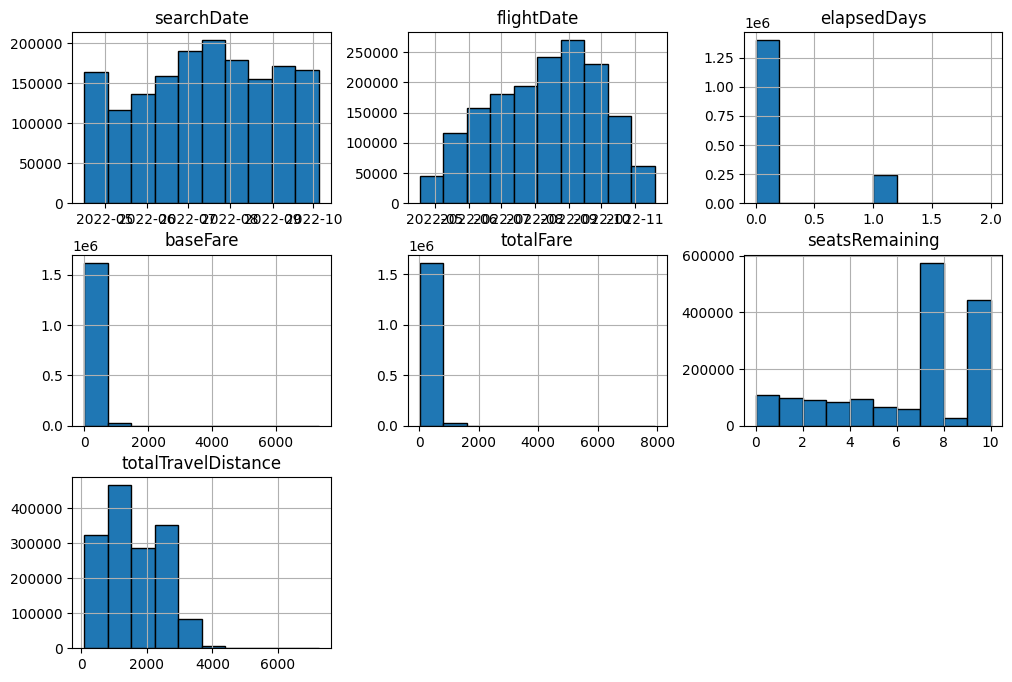

In [19]:
data.hist(edgecolor='black', figsize=(12,8))

### Frequenza dati categorici

Per calcolare invece la frequenza di ciascun valore in una colonna categorica, si è usato `value_counts()`.

Considerando le colonne categoriche *startingAirport* e *destinationAirport*, dai seguenti dati emerge che *LAX* è l'aeroporto più trafficato nel dataset, con 161326 voli in partenza e 159716 in arrivo. È seguito da *LGA* e *BOS* per il numero di partenze e da *DFW* per il numero di arrivi.

In [33]:
data['startingAirport'].value_counts()

startingAirport
LAX    161326
LGA    118959
BOS    117588
SFO    114690
DFW    113762
ORD    110207
CLT    109514
ATL    105455
MIA     98341
PHL     94605
DEN     93876
DTW     90617
JFK     88337
EWR     79084
OAK     76424
IAD     69990
Name: count, dtype: int64

In [22]:
data['destinationAirport'].value_counts()

destinationAirport
LAX    159716
LGA    122006
DFW    119330
BOS    116588
ORD    114424
SFO    111751
CLT    108115
ATL    104001
MIA    102136
PHL     93958
DEN     92487
DTW     88913
JFK     88009
EWR     81703
OAK     73236
IAD     66402
Name: count, dtype: int64

### Frequenza dati booleani

La maggior parte dei voli è di tipo non *basic economy* 1406095 occorrenze rispetto ai soli 236680 di voli *basic economy*. Questo indica che la classe *basic economy* è poco utilizzata.

In [30]:
data['isBasicEconomy'].value_counts()

isBasicEconomy
False    1406095
True      236680
Name: count, dtype: int64

Una grandissima parte dei voli è non *refundlable* 1642756 occorrenze rispetto ai soli 19 voli che consentono il rimborso. Questo significa che la maggior parte delle offerte non prevede il rimorso.

In [31]:
data['isRefundable'].value_counts()

isRefundable
False    1642756
True          19
Name: count, dtype: int64

Una parte consistente dei voli è con fermate, 1201293 occorrenze rispetto ai 441482 voli *non stop*. Questo suggerisce che anche essendo comuni i voli *non stop* la maggior parte dei voli fanno comunque scalo.

In [32]:
data['isNonStop'].value_counts()

isNonStop
False    1201293
True      441482
Name: count, dtype: int64

### Correlazioni tra dati numerici

La matrice di correlazione è una matrice quadrata, simmetrica e con gli elementi della diagonale principale tutti uguali ad 1.
 La correlazione indica la relazione lineare esistente tra due variabili:
- 1 significa che le due variabili hanno una relazione lineare diretta, vale a dire che all’aumentare di una aumenta anche l’altra;
- 0 significa che non è possibile stabilire fra le due variabili un andamento lineare;
- -1 significa che le due variabili hanno una relazione lineare inversa, vale a dire che all’aumentare di una, l’altra diminuisce.


Tramite la matrice di correlazione, innanzitutto è possibile notare come il prezzo base (*baseFare*) sia correlato al prezzo totale (*totalFare*), l'importo è lo stesso con l'aggiunta di tasse o spese fisse. Le correlazioni però più importanti sono tra la durata del viaggio (*travelDuration*) con la distanza (*totalDistance*) e tra la distanza e il prezzo base/totale. 
La prima è una correlazione abbastanza forte, più vicina all'1, indica che la durata è influenzata dalla distanza.
Una correlazione di 0.49 tra prezzo e distanza, invece, suggerisce che i voli più lunghi tendono a costare di più, ma ci sono altre variabili che possono influenzare il prezzo (ad esempio, la compagnia aerea, la domanda, la stagione, ecc.), quindi non è una relazione perfetta.

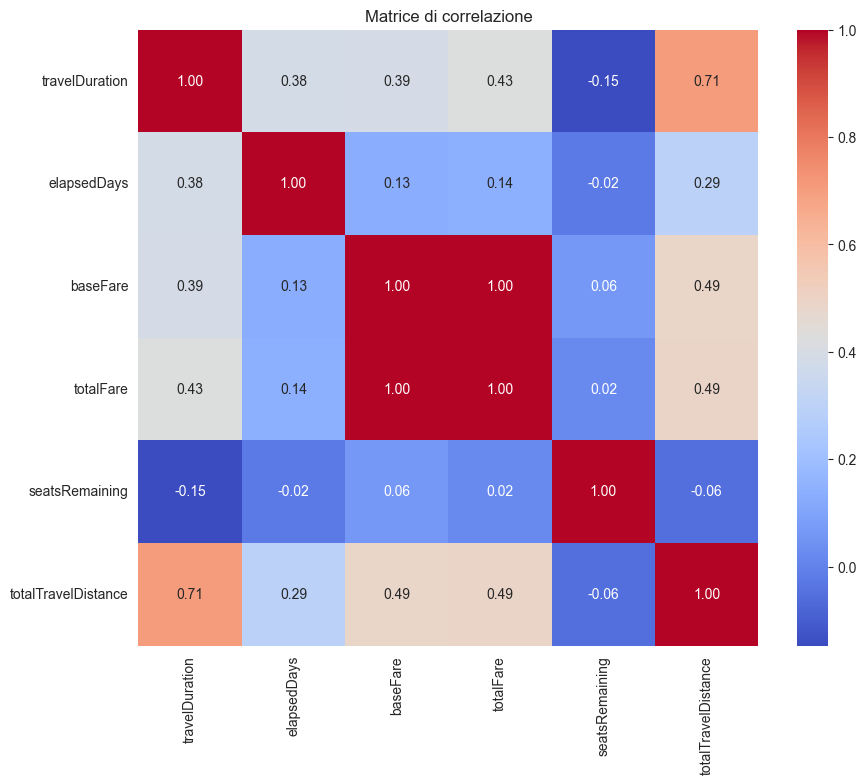

In [58]:
correlation_matrix = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di correlazione')
plt.show()

### Stagionalità

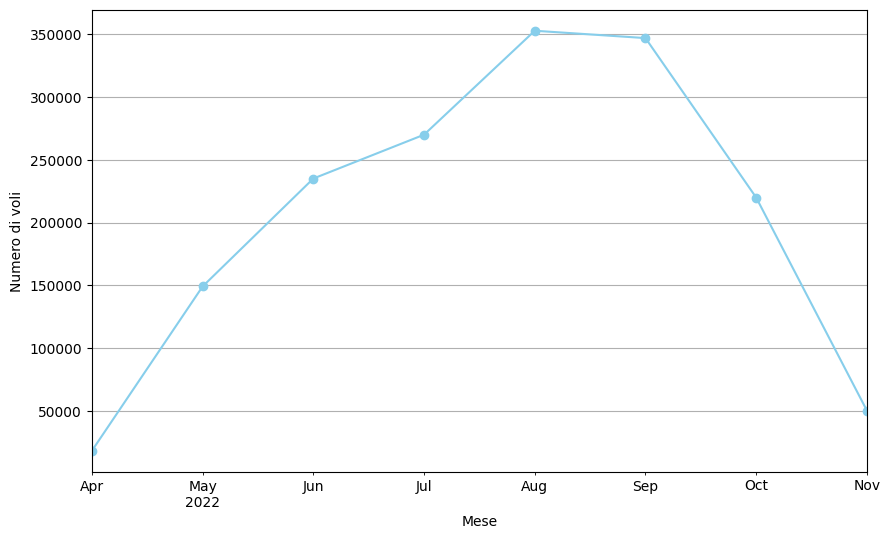

In [24]:
data['month'] = data['flightDate'].dt.to_period('M')
monthly_flights = data.groupby('month').size()

plt.figure(figsize=(10, 6))
monthly_flights.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Mese')
plt.ylabel('Numero di voli')
plt.grid()
plt.show()

In [50]:
data["searchDate"] - data["flightDate"]

0          -4 days
1          -6 days
2          -5 days
3         -31 days
4         -19 days
            ...   
1642770   -30 days
1642771   -31 days
1642772   -31 days
1642773   -33 days
1642774   -35 days
Length: 1642775, dtype: timedelta64[ns]

Numero di voli per aeroporto di partenza

In [61]:
count = np.sum(data["startingAirport"] == "DTW")
print(count)

90617


In [67]:
np.mean(data[data["startingAirport"] == "DTW"]["totalFare"])

np.float64(330.6507350717857)